# Logistic Regression from Scratch in TensorFlow

This notebook implements a simple binary logistic regression model from scratch using TensorFlow.

## 1. Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## 2. Generate Toy Data

In [2]:
num_samples = 100
X = np.random.randn(num_samples, 2).astype(np.float32)
y = (X[:, 0] + X[:, 1] > 0).astype(np.int32)

## 3. Define Model Parameters

In [3]:
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.zeros([1]))

## 4. Define the Model

In [4]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

def logistic_regression(x):
    return sigmoid(tf.matmul(x, W) + b)

## 5. Define the Loss Function

In [5]:
def loss_fn(y_true, y_pred):
    epsilon = 1e-7
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
    return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))

## 6. Define the Optimizer

In [6]:
optimizer = tf.optimizers.SGD(learning_rate=0.01)

## 7. Training Loop

In [7]:
epochs = 1000
losses = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = logistic_regression(X)
        loss = loss_fn(y.reshape(-1, 1), y_pred)
    
    losses.append(loss.numpy())
    
    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.numpy():.4f}')

Epoch 100/1000, Loss: 0.3204
Epoch 200/1000, Loss: 0.3010
Epoch 300/1000, Loss: 0.2850
Epoch 400/1000, Loss: 0.2716
Epoch 500/1000, Loss: 0.2601
Epoch 600/1000, Loss: 0.2501
Epoch 700/1000, Loss: 0.2413
Epoch 800/1000, Loss: 0.2334
Epoch 900/1000, Loss: 0.2264
Epoch 1000/1000, Loss: 0.2200


## 8. Visualize the Results

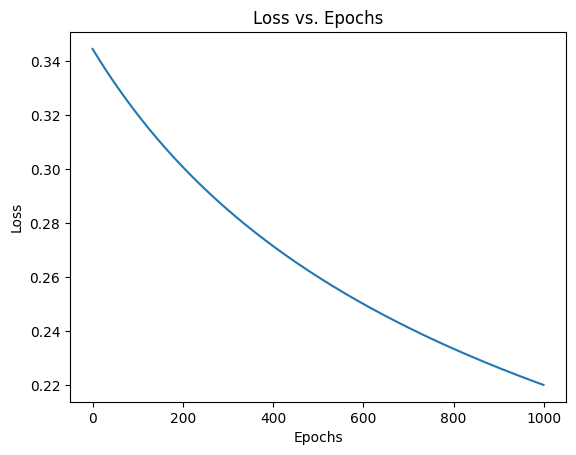

In [8]:
plt.plot(losses)
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

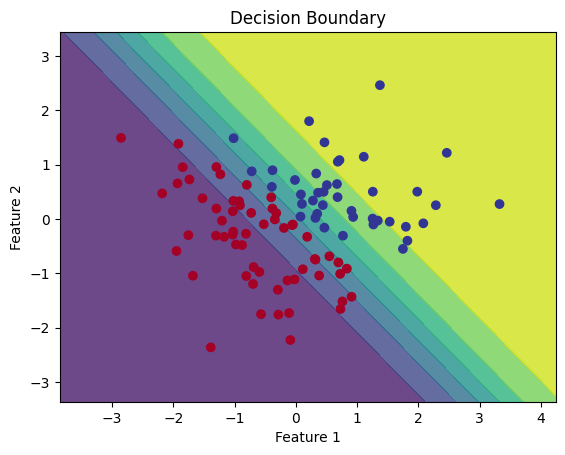

In [9]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                     np.arange(x2_min, x2_max, 0.1))
grid = np.c_[xx1.ravel(), xx2.ravel()].astype(np.float32)
probs = logistic_regression(grid).numpy().reshape(xx1.shape)

plt.contourf(xx1, xx2, probs, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()